Backpropagation con regla de la cadena para ajustar pesos y bias con una sola neurona

In [27]:
x = [1.0, -2.0, 3.0]  # input values 
w = [-3.0, -1.0, 2.0]  # weights 
b = 1.0  # bias

# Multiply inputs and weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
print(xw0, xw1, xw2, b)

# Output of neuron
z = xw0 + xw1 + xw2 + b
print(z)

# ReLU
y = max(z, 0) 
print(y)

-3.0 2.0 6.0 1.0
6.0
6.0


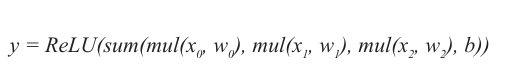
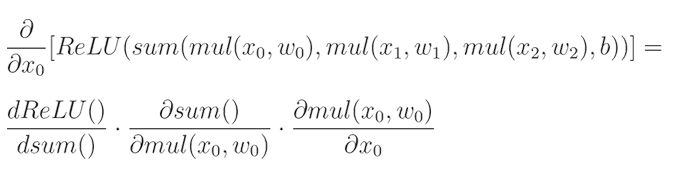

In [28]:
# Derivative of ReLU, as it is a max function the derivative is either 1 or 0, depending on the sum, in this case it is z
dz_relu = (1 if z>0 else 0)
print('Value of the derivative of the ReLU:',dz_relu)

# Derivative of the sum, here we have to consider the parcial diferenciation it is cast uppon
dxw0_sum = 1
dxw1_sum = 1
dxw2_sum = 1
db_sum = 1

# Derivative of the multiplication, here we have to consider the parcial diferenciation it is cast uppon
dx0_mult = w[0]
dx1_mult = w[1]
dx2_mult = w[2]
dw0_mult = x[0]
dw1_mult = x[1]
dw2_mult = x[2]
db_mult = 1

# Now we calculate each parcial for every value
par_x0 = dz_relu * dxw0_sum * dx0_mult
par_x1 = dz_relu * dxw1_sum * dx1_mult
par_x2 = dz_relu * dxw2_sum * dx2_mult
par_w0 = dz_relu * dxw0_sum * dw0_mult
par_w1 = dz_relu * dxw1_sum * dw1_mult
par_w2 = dz_relu * dxw2_sum * dw2_mult
par_b =  dz_relu * db_sum * db_mult

print(par_x0,par_w0,par_x1,par_w1,par_x2,par_w2,par_b)

Value of the derivative of the ReLU: 1
-3.0 1.0 -1.0 -2.0 2.0 3.0 1


Now we will make the gradients of x,w and b in order to adjust the weights and biases to a better result

In [25]:
# Gradients
dx = [par_x0,par_x1,par_x2]
dw = [par_w0,par_w1,par_w2]
db = par_b

# Apply a learning rate to the gradients
w[0] += -0.001 * dw[0] 
w[1] += -0.001 * dw[1] 
w[2] += -0.001 * dw[2] 
b += -0.001 * db 
print(w,b)

[-3.001, -0.998, 1.997] 0.999


Now backpropagation with multiple layers

In [25]:
import numpy as np

#Gradient from the next layer 
dvalues = np.array([[1., 1., 1.]])

#3 sets of weights one for each neuron
#4 inputs, thus 4 weights per set
weights = np.array([[0.2, 0.8, -0.5, 1], 
                    [0.5, -0.91, 0.26, -0.5], 
                    [-0.26, -0.27, 0.17, 0.87]]).T 


# sum weights of given input 
# and multiply by the passed in gradient for this neuron 
dinputs = np.dot(dvalues[0], weights.T)

print(dinputs)

[ 0.44 -0.38 -0.07  1.37]


Multiple inputs, gradient respect to inputs

In [26]:
# Passed in gradient from the next layer 
# for the purpose of this example we're going to use 
# an array of an incremental gradient values 
dvalues = np.array([[1., 1., 1.], 
                    [2., 2., 2.], 
                    [3., 3., 3.]]) 
 
# We have 3 sets of weights - one set for each neuron 
# we have 4 inputs, thus 4 weights 
# recall that we keep weights transposed 
weights = np.array([[0.2, 0.8, -0.5, 1], 
                    [0.5, -0.91, 0.26, -0.5], 
                    [-0.26, -0.27, 0.17, 0.87]]).T

# sum weights of given input 
# and multiply by the passed in gradient for this neuron 
dinputs = np.dot(dvalues, weights.T) 
 
print(dinputs)

[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


Multiple inputs, gradient respect to weights

In [27]:
import numpy as np 
 
# Passed in gradient from the next layer 
# for the purpose of this example we're going to use 
# an array of an incremental gradient values 
dvalues = np.array([[1., 1., 1.], 
                    [2., 2., 2.], 
                    [3., 3., 3.]]) 
 
# We have 3 sets of inputs - samples 
inputs = np.array([[1, 2, 3, 2.5], 
                   [2., 5., -1., 2], 
                   [-1.5, 2.7, 3.3, -0.8]]) 
 
# sum weights of given input 
# and multiply by the passed in gradient for this neuron 
dweights = np.dot(inputs.T, dvalues) 
 
print(dweights) 

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


For biases

In [29]:

# Passed in gradient from the next layer 
# for the purpose of this example we're going to use 
# an array of an incremental gradient values 
dvalues = np.array([[1., 1., 1.], 
                    [2., 2., 2.], 
                    [3., 3., 3.]]) 
 
# One bias for each neuron 
# biases are the row vector with a shape (1, neurons) 
biases = np.array([[2, 3, 0.5]]) 
 
# dbiases - sum values, do this over samples (first axis), keepdims 
# since this by default will produce a plain list - 
# we explained this in the chapter 4 
dbiases = np.sum(dvalues, axis=0, keepdims =True) 
 
print(dbiases) 

[[6. 6. 6.]]


Now for ReLU

In [30]:
# Example layer output 
z = np.array([[1, 2, -3, -4], 
              [2, -7, -1, 3], 
              [-1, 2, 5, -1]]) 
 
dvalues = np.array([[1, 2, 3, 4], 
                    [5, 6, 7, 8], 
                    [9, 10, 11, 12]]) 
 
# ReLU activation's derivative 
drelu = np.zeros_like(z) 
drelu[z > 0] = 1 
 
print(drelu) 
 
# The chain rule 
drelu *= dvalues 
 
print(drelu)

[[1 1 0 0]
 [1 0 0 1]
 [0 1 1 0]]
[[ 1  2  0  0]
 [ 5  0  0  8]
 [ 0 10 11  0]]


All together

In [10]:
import numpy as np 
 
# Passed in gradient from the next layer 
# for the purpose of this example we're going to use 
# an array of an incremental gradient values 
dvalues = np.array([[1., 1., 1.], 
                    [2., 2., 2.], 
                    [3., 3., 3.]]) 
 
# We have 3 sets of inputs - samples 
inputs = np.array([[1, 2, 3, 2.5], 
                   [2., 5., -1., 2], 
                   [-1.5, 2.7, 3.3, -0.8]]) 
# We have 3 sets of weights - one set for each neuron 
# we have 4 inputs, thus 4 weights 
# recall that we keep weights transposed 
weights = np.array([[0.2, 0.8, -0.5, 1], 
                    [0.5, -0.91, 0.26, -0.5], 
                    [-0.26, -0.27, 0.17, 0.87]]).T

# One bias for each neuron 
# biases are the row vector with a shape (1, neurons) 
biases = np.array([[2, 3, 0.5]]) 
# Forward pass 
layer_outputs = np.dot(inputs, weights) + biases  # Dense layer 
relu_outputs = np.maximum(0, layer_outputs)  # ReLU activation 
# Let's optimize and test backpropagation here 
# ReLU activation - simulates derivative with respect to input values 
# from next layer passed to current layer during backpropagation 
drelu = relu_outputs.copy() 
drelu[layer_outputs <= 0] = 0 
# Dense layer 
# dinputs - multiply by weights 
dinputs = np.dot(drelu, weights.T) 
# dweights - multiply by inputs 
dweights = np.dot(inputs.T, drelu) 
# dbiases - sum values, do this over samples (first axis), keepdims 
# since this by default will produce a plain list - 
# we explained this in the chapter 4 
dbiases = np.sum(drelu, axis=0, keepdims = True)
 
# print(dbiases)
# print(layer_outputs)
# print(drelu)
# Update parameters 

weights += -0.001 * dweights 
biases += -0.001 * dbiases 
print(weights) 

print(biases) 

[[ 0.179515   0.5003665 -0.262746 ]
 [ 0.742093  -0.9152577 -0.2758402]
 [-0.510153   0.2529017  0.1629592]
 [ 0.971328  -0.5021842  0.8636583]]
[[1.98489  2.997739 0.497389]]


In [ ]:
#Dense layer 
class Layer_Dense: 
 
    # Layer initialization 
    def __init__(self, inputs, neurons): 
        self.weights = 0.01 * np.random.randn(inputs, neurons) 
        self.biases = np.zeros((1, neurons)) 
 
    # Forward pass 
    def forward(self, inputs): 
        self.output = np.dot(inputs, self.weights) + self.biases 
        self.inputs = inputs
    
    def backward(self, dvalues):
        
        self.dweights = np.dot(self.inputs.T,dvalues)
        self.dbiases = np.sum(dvalues,axis=0,keepdims=True)
        
        self.dinputs = np.dot(dvalues,self.weights.T)

In [ ]:
class Activation_ReLU: 
 
    # Forward pass 
    def forward(self, inputs): 
        self.output = np.maximum(0, inputs)
        self.inputs = inputs
    
    def backward(self):
        self.dinputs = np.copy(self.output)
        self.dinputs[self.inputs <= 0] = 0

In [16]:
np.log(.3)

-1.2039728043259361